# Vehicle Dent Detection with UNET

## Necessary Imports

In [1]:
import os
import cv2
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Setting up the Runtime

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Note: Upload the unet codebase with the name unet.tar.gz (you can create it with the command *"tar -cvf unet"*)**

In [ ]:
!pwd
!tar -xvf unet.tar.gz

/content
unet/
unet/UNet.py
unet/utils/
unet/utils/pipeline.py
unet/utils/save_model_config.py
unet/utils/testing_util.py
unet/utils/.ipynb_checkpoints/
unet/utils/.ipynb_checkpoints/testing_util-checkpoint.py
unet/utils/.ipynb_checkpoints/viz_utils-checkpoint.py
unet/utils/.ipynb_checkpoints/pipeline-checkpoint.py
unet/utils/viz_utils.py
unet/utils/__pycache__/
unet/utils/__pycache__/testing_util.cpython-38.pyc
unet/utils/__pycache__/viz_utils.cpython-38.pyc
unet/utils/__pycache__/pipeline.cpython-38.pyc
unet/utils/__pycache__/save_model_config.cpython-38.pyc
unet/model/
unet/model/unet.py
unet/model/custom_model.py
unet/model/.ipynb_checkpoints/
unet/model/.ipynb_checkpoints/unet-checkpoint.py
unet/model/.ipynb_checkpoints/custom_model-checkpoint.py
unet/model/__pycache__/
unet/model/__pycache__/unet.cpython-39.pyc
unet/model/__pycache__/custom_model.cpython-38.pyc
unet/model/__pycache__/unet.cpython-38.pyc
unet/__pycache__/
unet/__pycache__/UNet.cpython-38.pyc


##The UNet Model

## Setup the Model

In [3]:
from unet.UNet import UNet

In [4]:
test_images = r'/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_images'
test_masks = r'/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_pixel_masks'

train_images = r'/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/train_images'
train_masks = r'/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/train_pixel_masks'

In [5]:
checkpoint_path = '.'#r'/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/models/unet/train_3'

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.001)

In [7]:
params = {
    'loss': 'sparse_categorical_crossentropy',
    'batch_size': 16,
    'optimizer': optimizer,
    'epochs': 100,
    'image_shape': (224, 224),
    'seed': 47,
    'apply_augmentation': True,
    'augmentation_threshold': 0.4,
    'checkpoint_path': checkpoint_path,
    'train_path': (train_images, train_masks),
    'val_path': (test_images, test_masks),
    'test_path': (test_images, test_masks)
}

In [15]:
model = UNet(params)

[INFO]: Parameters loaded
[INFO]:Data loaded sucessfully
[INFO]: model generated successfully


In [16]:
model.get_parameters()

{'apply_augmentation': True,
 'augmentation_threshold': 0.4,
 'batch_size': 16,
 'checkpoint_path': '.',
 'epochs': 100,
 'image_shape': (224, 224),
 'loss': 'sparse_categorical_crossentropy',
 'optimizer': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x7ff889d7f590>,
 'seed': 47,
 'test_count': 79,
 'test_path': ('/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_images',
  '/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_pixel_masks'),
 'train_count': 4960,
 'train_path': ('/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/train_images',
  '/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/train_pixel_masks'),
 'val_count': 79,
 'val_path': ('/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_images',
  '/content/drive/MyDrive/DL_RoadSafety_VehicleDentDetection/versioned_dataset/ver_1/test_pixe

### Visualize the data(optional)

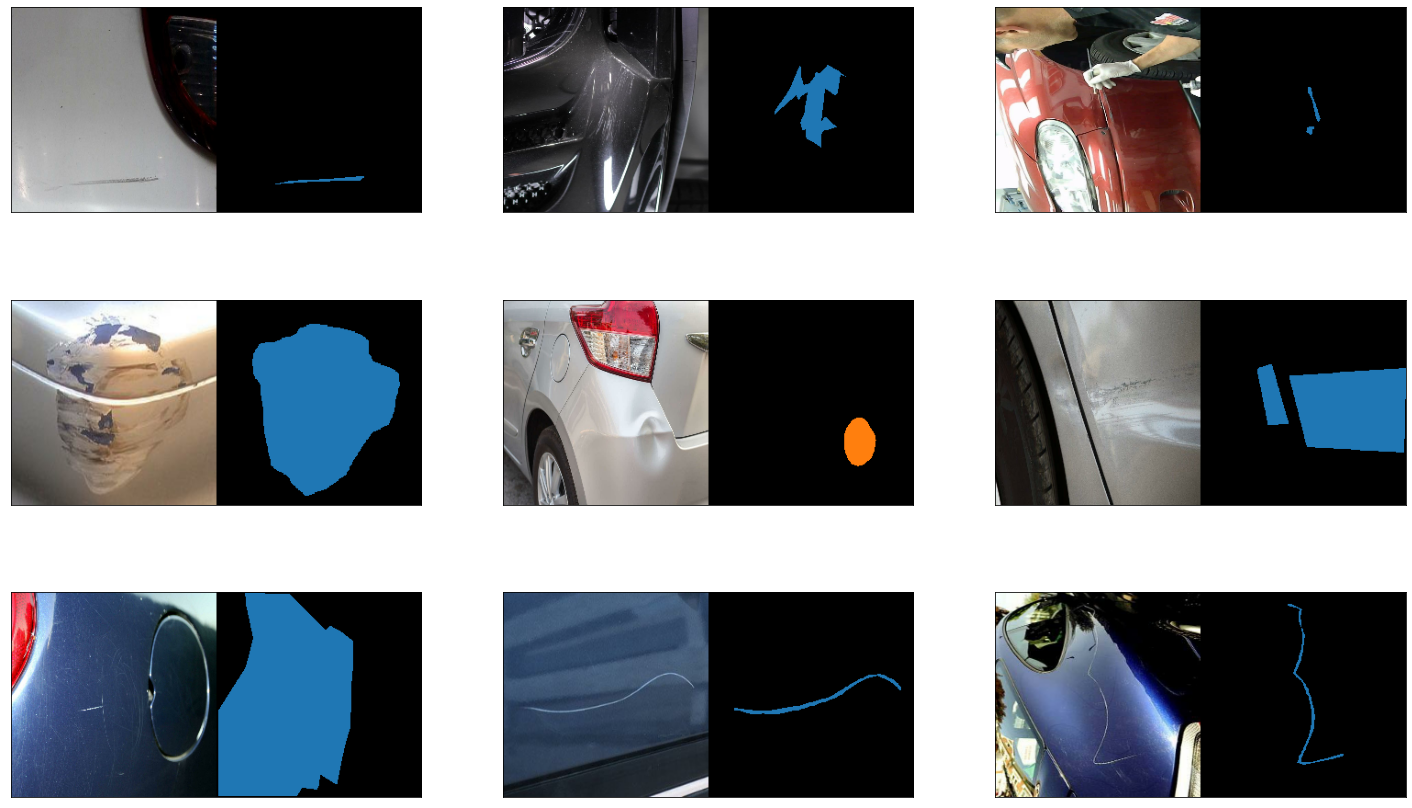

In [ ]:
model.visualize_data()

### Train the Model

In [17]:
model.train()

Epoch 1/100
310/310 [==============================] - 2064s 7s/step - loss: 1.4077 - accuracy: 0.2637 - val_loss: 1.3859 - val_accuracy: 0.2803
Epoch 2/100
310/310 [==============================] - 1933s 6s/step - loss: 1.3854 - accuracy: 0.2820 - val_loss: 1.3839 - val_accuracy: 0.2946
Epoch 3/100
 12/310 [>.............................] - ETA: 20:12 - loss: 1.3840 - accuracy: 0.2929

KeyboardInterrupt: ignored

## Save the Model and Parameters

In [11]:
model.save_model()

In [20]:
param_path = os.path.join(checkpoint_path, 'parameters.md')
with open(param_path, 'w') as f:
  f.write(json.dumps(params))

## Check Model Performance

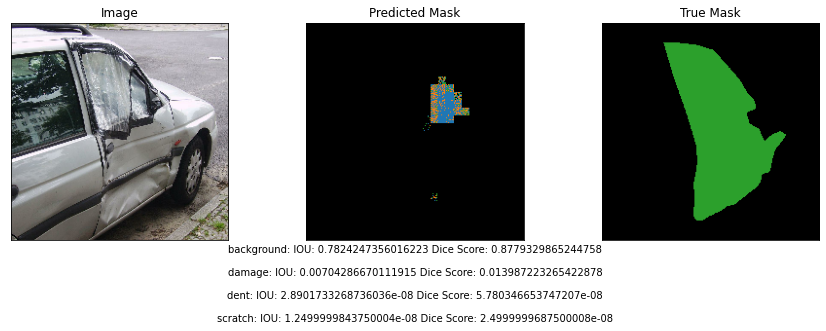

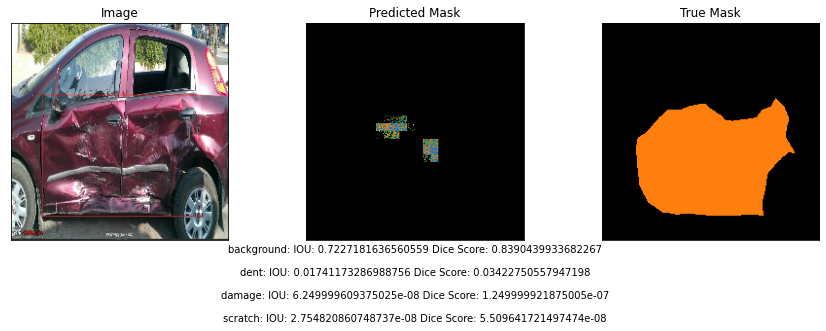

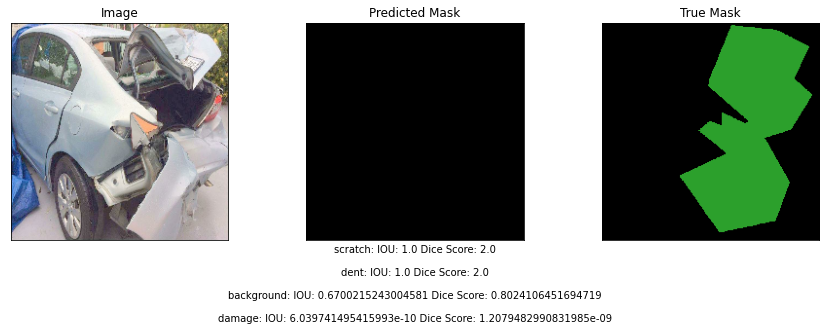

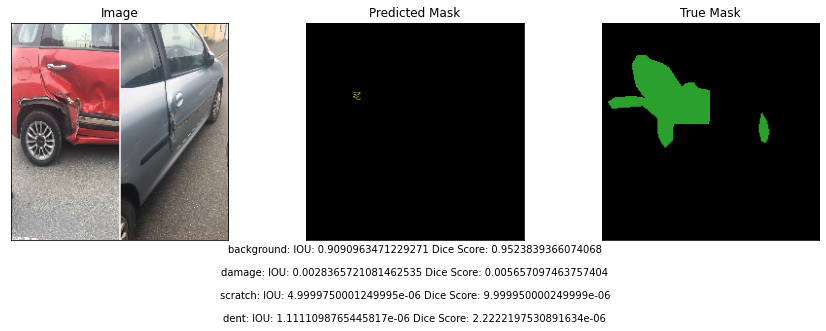

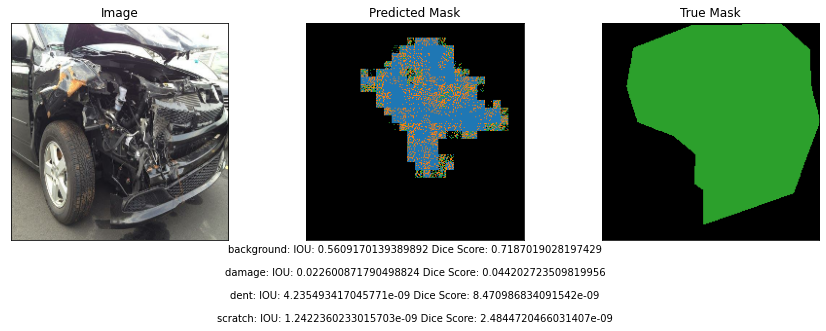

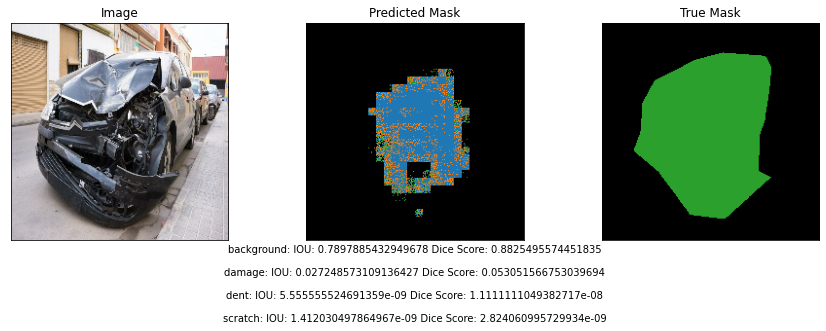

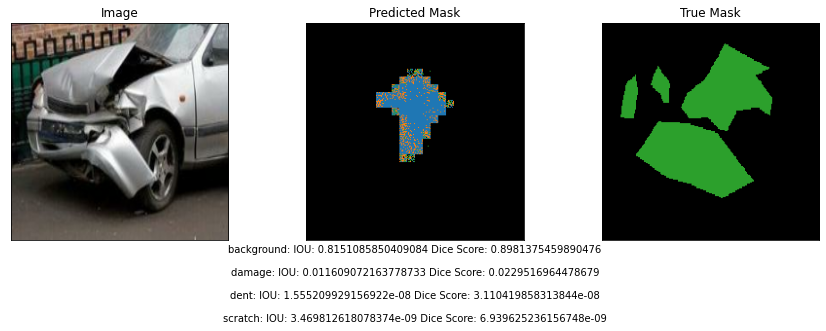

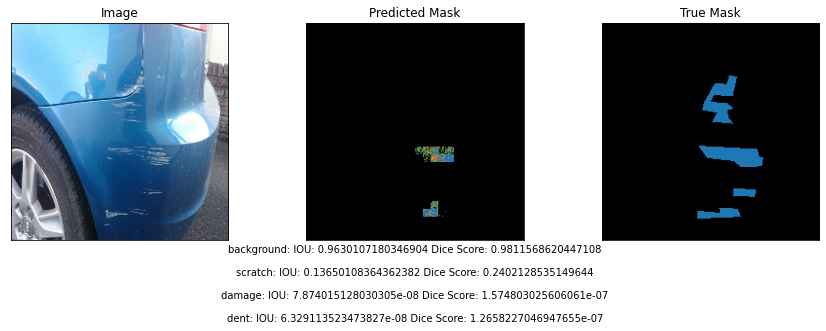

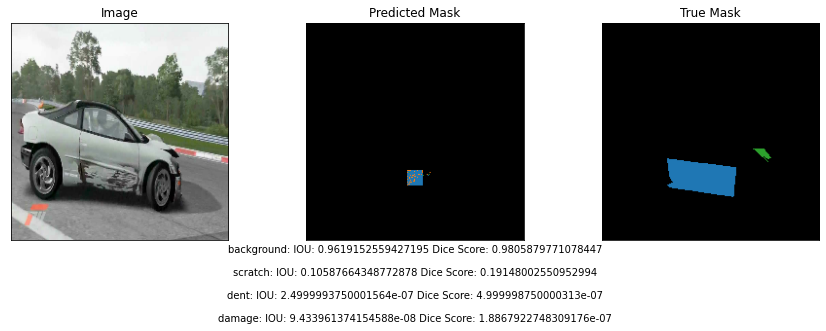

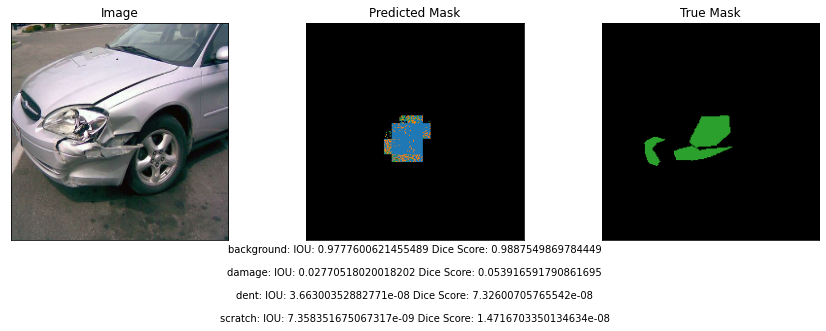

In [12]:
model.show_prediction_result()